In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install pandas_datareader
import pandas_datareader as data

In [5]:
start = '2010-01-01'
end='2020-12-31'

df=data.DataReader('AAPL','yahoo',start,end)
df.head()




,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.415357
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.515212
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.526476
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.422665
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.410792


In [6]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,130.404602
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,135.068588
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,133.270157
2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,132.133850
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,131.116028


In [7]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.415357
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.515212
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.526476
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.422665
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.410792


In [11]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


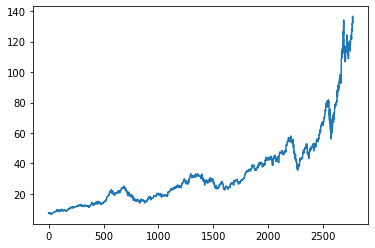

In [14]:
plt.plot(df.Close)

In [15]:
ma100=df.Close.rolling(100).mean()

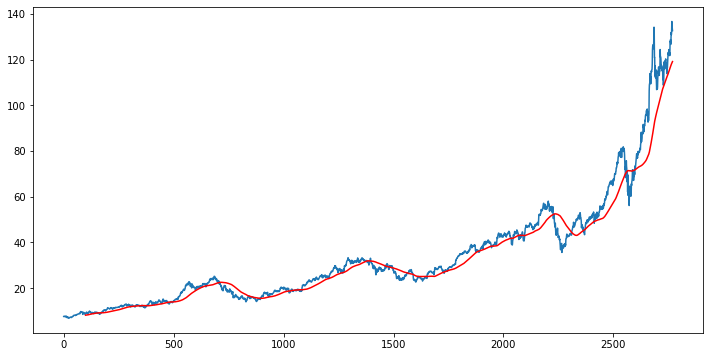

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [17]:
ma200=df.Close.rolling(200).mean()

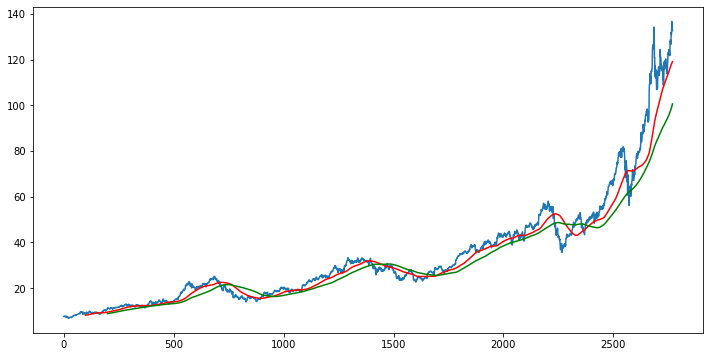

In [18]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

#if 100 days crosses above 200 the uptrend in market, otherwise downtrend

In [19]:
df.shape

(2770, 5)

In [20]:
train=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
test=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(train.shape)
print(test.shape)

(1938, 1)
(832, 1)


In [21]:
train.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [22]:
test.head()

,Close
1938,39.912498
1939,39.570000
1940,39.970001
1941,39.667500
1942,39.682499


In [52]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))

In [25]:
train_arr=sc.fit_transform(train)
train_arr

array([[0.01953359],
       [0.02296349],
       [0.0233504 ],
       ...,
       [0.96032627],
       [0.98133429],
       [0.97664957]])

In [30]:
#prediction on new day depends on previous x days,here 100 days
x_train =[]
y_train=[]

for i in range(100,train_arr.shape[0]):
    x_train.append(train_arr[i-100:i])
    y_train.append(train_arr[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

In [36]:
#ML model
!pip install tensorflow==2.0.0
!pip install keras

ERROR: Could not find a version that satisfies the requirement tensorflow==2.0.0
ERROR: No matching distribution found for tensorflow==2.0.0


In [40]:
import keras
import tensorflow
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [41]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation='relu',return_sequences=True,))
model.add(Dropout(0.3))


model.add(LSTM(units=80,activation='relu',return_sequences=True,))
model.add(Dropout(0.4))


model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [43]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
58/58 [==============================] - 33s 392ms/step - loss: 0.0418
Epoch 2/50
58/58 [==============================] - 21s 363ms/step - loss: 0.0087
Epoch 3/50
58/58 [==============================] - 24s 421ms/step - loss: 0.0079
Epoch 4/50
58/58 [==============================] - 24s 405ms/step - loss: 0.0067
Epoch 5/50
58/58 [==============================] - 25s 427ms/step - loss: 0.0059
Epoch 6/50
58/58 [==============================] - 23s 403ms/step - loss: 0.0060
Epoch 7/50
58/58 [==============================] - 24s 409ms/step - loss: 0.0054
Epoch 8/50
58/58 [==============================] - 25s 429ms/step - loss: 0.0058
Epoch 9/50
58/58 [==============================] - 24s 418ms/step - loss: 0.0058
Epoch 10/50
58/58 [==============================] - 25s 425ms/step - loss: 0.0051
Epoch 11/50
58/58 [==============================] - 24s 416ms/step - loss: 0.0046
Epoch 12/50
58/58 [==============================] - 23s 404ms/step - loss: 0.0047
Epoch 13/50
5

In [44]:
model.save('stock_trend_prediction.h5')

In [45]:
test.head()

,Close
1938,39.912498
1939,39.570000
1940,39.970001
1941,39.667500
1942,39.682499


In [46]:
train.tail(100)

,Close
1838,35.567501
1839,35.910000
1840,36.132500
1841,35.919998
1842,35.947498
...,...
1933,40.477501
1934,40.314999
1935,39.657501
1936,40.375000


In [47]:
past_100_days=train.tail(100)

In [48]:
final_df=past_100_days.append(test,ignore_index=True)

In [49]:
final_df.head()

,Close
0,35.567501
1,35.910000
2,36.132500
3,35.919998
4,35.947498


In [53]:
input_data=sc.fit_transform(final_df)

In [54]:
input_data

array([[1.97745334e-04],
       [3.58404460e-03],
       [5.78390957e-03],
       [3.68289840e-03],
       [3.95479352e-03],
       [3.60874862e-03],
       [1.08510253e-02],
       [1.31497441e-02],
       [1.20374596e-02],
       [1.07274298e-02],
       [1.67338264e-02],
       [2.67444246e-02],
       [2.91667767e-02],
       [2.73623646e-02],
       [2.90678851e-02],
       [3.43821920e-02],
       [3.33934653e-02],
       [3.28249711e-02],
       [1.99223803e-02],
       [2.55826944e-02],
       [2.68680202e-02],
       [2.91667767e-02],
       [2.86971362e-02],
       [2.75601100e-02],
       [2.88701398e-02],
       [2.82274958e-02],
       [2.83757953e-02],
       [2.61264846e-02],
       [2.71646193e-02],
       [3.27755253e-02],
       [2.90184394e-02],
       [3.03037652e-02],
       [3.25777800e-02],
       [3.16385368e-02],
       [1.67832345e-02],
       [7.98377455e-03],
       [1.08757293e-02],
       [7.34113050e-03],
       [5.19067357e-03],
       [1.97745334e-04],


In [55]:
input_data.shape

(932, 1)

In [59]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

In [60]:
x_test,y_test=np.array(x_test),np.array(y_test)

In [61]:
print(x_test.shape)
print(y_test.shape)

(832, 100, 1)
(832,)


In [62]:
#making predictions

y_predicted = model.predict(x_test)

26/26 [==============================] - 5s 145ms/step


In [63]:
y_predicted.shape

(832, 1)

In [64]:
y_test

array([0.04315691, 0.03977061, 0.04372544, 0.0407346 , 0.0408829 ,
       0.03430804, 0.02768371, 0.02397607, 0.02066392, 0.02706577,
       0.02975997, 0.02741181, 0.02948808, 0.02872184, 0.03037791,
       0.02790615, 0.03262723, 0.03240478, 0.03373951, 0.03388781,
       0.03549448, 0.034135  , 0.03658206, 0.04372544, 0.04518377,
       0.04342881, 0.03408556, 0.03475294, 0.0345552 , 0.03685395,
       0.03514843, 0.03762019, 0.05156092, 0.06063227, 0.06636674,
       0.06105247, 0.06406802, 0.07491904, 0.07924462, 0.0806288 ,
       0.08416344, 0.0832736 , 0.08028276, 0.07855253, 0.07205179,
       0.06646563, 0.07145859, 0.06911039, 0.0686902 , 0.07650097,
       0.08099959, 0.08102429, 0.07884913, 0.07632796, 0.06745432,
       0.07331241, 0.071335  , 0.0682453 , 0.06784981, 0.06629259,
       0.06705886, 0.06718242, 0.07533924, 0.07294163, 0.07435055,
       0.07422695, 0.07855253, 0.08460834, 0.07996142, 0.07949181,
       0.08112315, 0.08112315, 0.07014856, 0.07022271, 0.07140

In [65]:
y_predicted

array([[0.10675111],
       [0.10698475],
       [0.107159  ],
       [0.10726878],
       [0.10731678],
       [0.10730553],
       [0.10723752],
       [0.10710637],
       [0.10690013],
       [0.10660732],
       [0.10622352],
       [0.10576178],
       [0.10524288],
       [0.10468763],
       [0.10411832],
       [0.10355416],
       [0.10301211],
       [0.10250303],
       [0.10204074],
       [0.10163456],
       [0.10129154],
       [0.10101494],
       [0.10080612],
       [0.10066141],
       [0.10057996],
       [0.10057008],
       [0.10063773],
       [0.10077767],
       [0.10096632],
       [0.10118055],
       [0.10140012],
       [0.10161197],
       [0.10180543],
       [0.10198258],
       [0.10217533],
       [0.10243478],
       [0.10281008],
       [0.10332176],
       [0.10398728],
       [0.10483667],
       [0.10589346],
       [0.10716793],
       [0.10865708],
       [0.11033082],
       [0.11213306],
       [0.11398742],
       [0.11580212],
       [0.117

In [66]:
sc.scale_

array([0.00988704])

In [67]:
scale_factor=1/0.00988704

y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

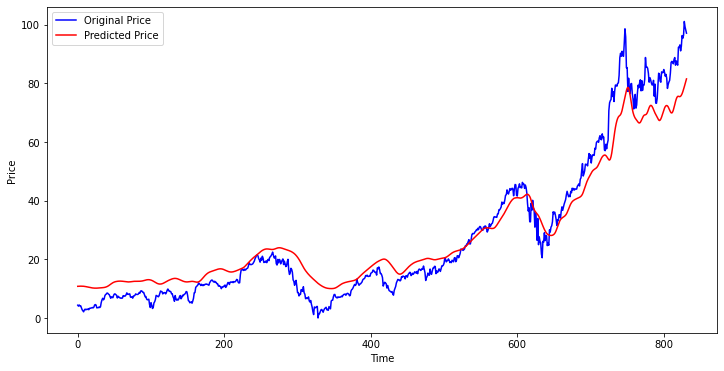

In [69]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()